In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Librerias
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split, KFold
from keras.callbacks import EarlyStopping

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import load_model

from keras.initializers import he_uniform

from tensorflow.keras.optimizers import RMSprop


In [85]:
#Dataset Adulto 02
data = pd.read_csv('/content/gdrive/MyDrive/Proyecto_de_grado/SUSTENTACION3.0/FinalX3/adulto02/my_adult02A2_data.csv')

print(f"El archivo se ha cargado correctamente. Tiene {data.shape[0]} filas y {data.shape[1]} columnas.")

El archivo se ha cargado correctamente. Tiene 29638 filas y 3 columnas.


In [86]:
train_size = int(len(data) * 0.7)

train_data = data.iloc[:train_size, :] # 70% entrenamiento
test_data = data.iloc[train_size:, :] # 30% prueba

test_data = test_data.reset_index(drop=True)

In [87]:
#los indices donde hay ingestas
posicionestrain = train_data.loc[train_data.iloc[:, 0] != 0].index
posicionestest = test_data.loc[test_data.iloc[:, 0] != 0].index

df_posiciones_train = pd.DataFrame(posicionestrain)
df_posiciones_test = pd.DataFrame(posicionestest)

In [88]:

# Crear una lista para almacenar los valores anteriores que cumplen la condición
cumplen_train = []

# Comparar los elementos de la posición anterior con los elementos siguientes
for i in range(1, len(df_posiciones_train)):
    anterior = df_posiciones_train.iloc[i-1, 0]  # Obtener el elemento anterior de la segunda columna
    siguiente = df_posiciones_train.iloc[i, 0]  # Obtener el elemento actual de la segunda columna

    if siguiente >= 10 + anterior:
        cumplen_train.append(anterior)

ultimo_elemento_train = df_posiciones_train.iloc[-1]

# Unir el último elemento a la otra lista
cumplen_train.extend(ultimo_elemento_train.tolist())

# Imprimir la lista de valores anteriores que cumplen la condición
print(cumplen_train)
print(len(cumplen_train))


[494, 862, 1358, 1974, 2353, 2840, 3461, 3846, 4334, 4956, 5324, 5820, 6438, 6815, 7301, 7917, 8283, 8781, 9398, 9781, 10268, 10880, 11255, 11750, 12363, 12742, 13230, 13845, 14212, 14699, 15311, 15686, 16183, 16795, 17162, 17650, 18266, 18653, 19140, 19757, 20125, 20614]
42


In [89]:
# Crear una lista para almacenar los valores anteriores que cumplen la condición
cumplen_test = []

# Comparar los elementos de la posición anterior con los elementos siguientes
for i in range(1, len(df_posiciones_test)):
    anterior = df_posiciones_test.iloc[i-1, 0]  # Obtener el elemento anterior de la segunda columna
    siguiente = df_posiciones_test.iloc[i, 0]  # Obtener el elemento actual de la segunda columna

    if siguiente >= 10 + anterior:
        cumplen_test.append(anterior)

ultimo_elemento_test = df_posiciones_test.iloc[-1]

# Unir el último elemento a la otra lista
cumplen_test.extend(ultimo_elemento_test.tolist())

# Imprimir la lista de valores anteriores que cumplen la condición
print(cumplen_test)
print(len(cumplen_test))


[487, 855, 1342, 1956, 2335, 2823, 3439, 3805, 4301, 4916, 5291, 5779, 6398, 6765, 7253, 7868, 8234, 8720]
18



Grafica de los datos del dataset


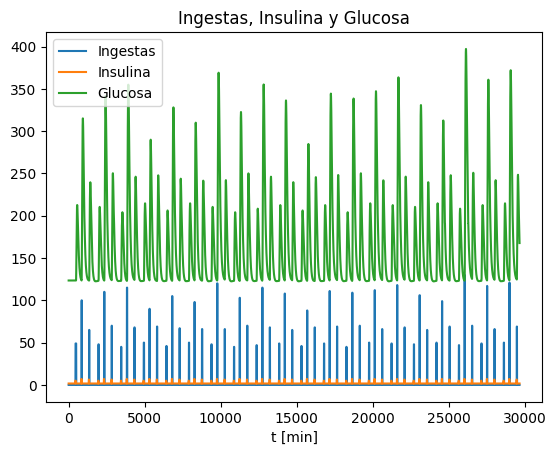


Caso 1: Primera ingesta o Desayuno del primer dia:


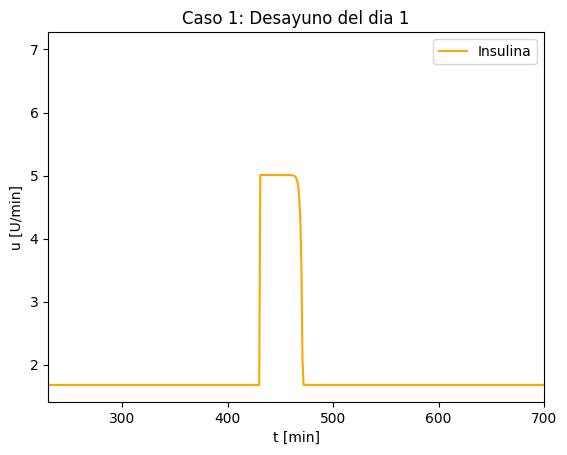

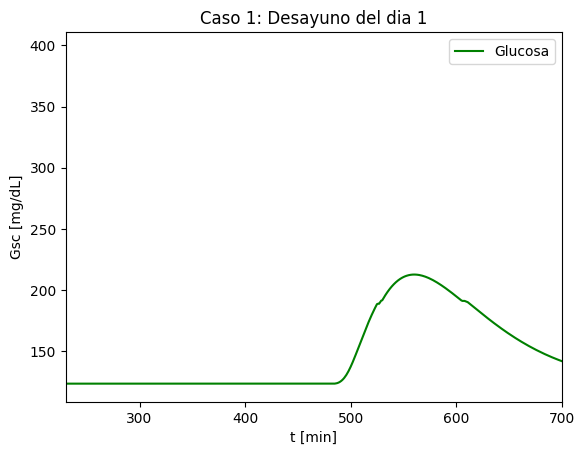

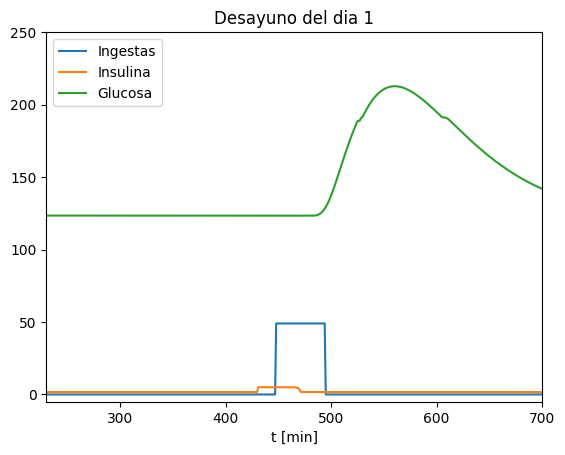


Caso 2: Primera y segunda ingesta del primer dia:


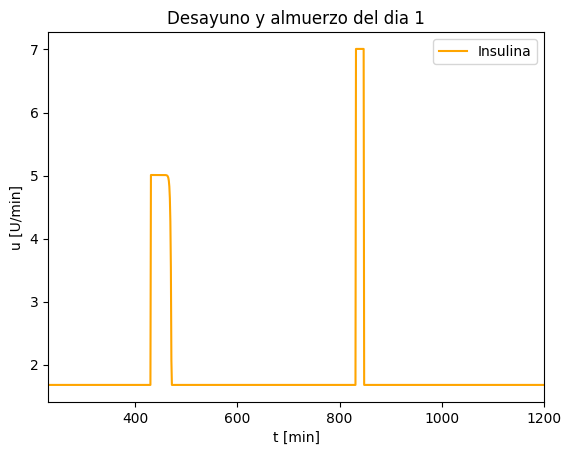

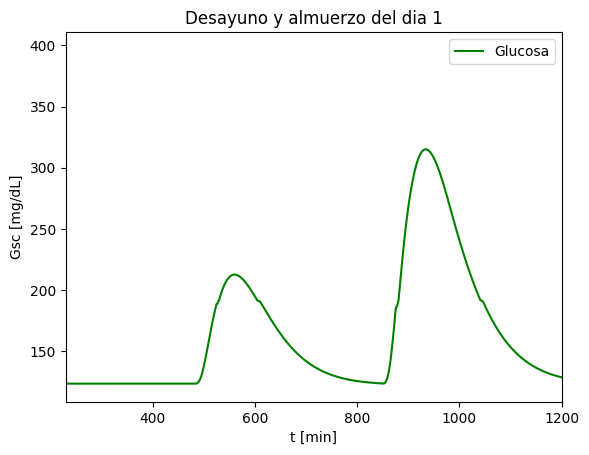

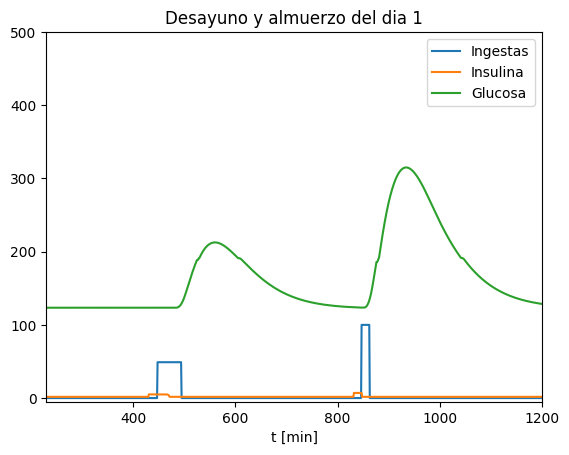

Caso 3: las tres ingestas del primer dia:


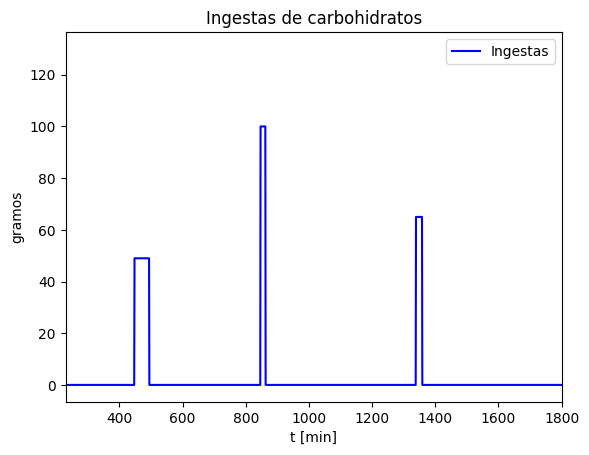

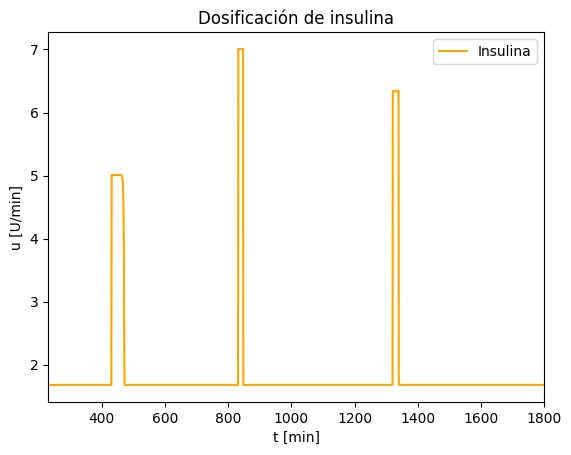

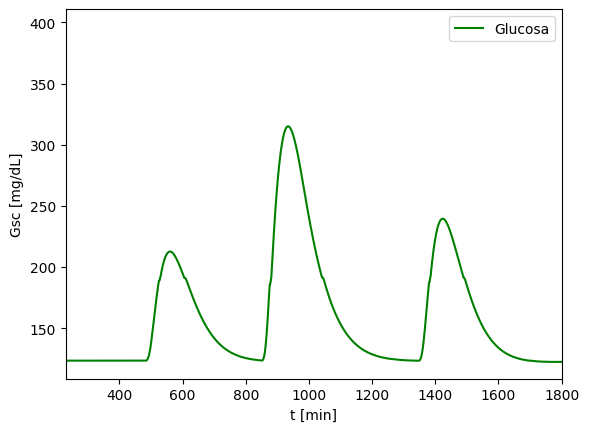

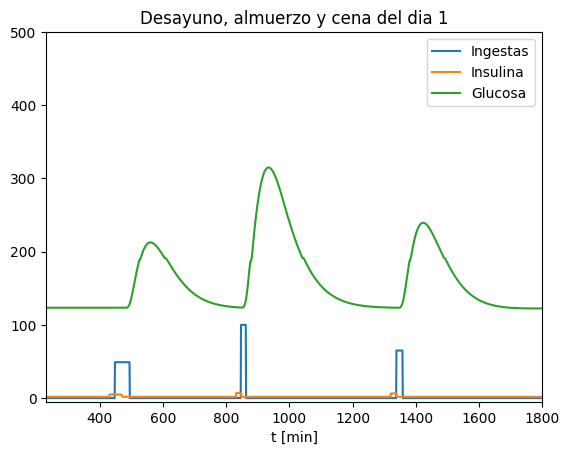

In [28]:
# pasar la escala de los carbohidratos de las ingestas a gramos
data.iloc[:,0] = data.iloc[:,0].apply(lambda x: (x*15)/1000)

# Grafica con mayor detalle, el pico del comportamiento de la glucosa despues de la primera ingesta
print('')
print('Grafica de los datos del dataset')
plt.plot(data, label=['Ingestas', 'Insulina','Glucosa'])
plt.title('Ingestas, Insulina y Glucosa')
plt.xlabel('t [min]')
#plt.ylabel('Valor de la glucosa')
plt.legend()
#plt.xlim([209, 220])
#plt.ylim([185, 190])
plt.show()
print('')

print('Caso 1: Primera ingesta o Desayuno del primer dia:')
plt.plot(data.index, data.iloc[:,1], color='orange', label='Insulina')
#plt.plot(y_pred,color='orange', label='Valores predichos')
plt.title('Caso 1: Desayuno del dia 1')
plt.xlabel('t [min]')
plt.ylabel('u [U/min]')
plt.legend()
plt.xlim([230, 700])
#plt.ylim([185, 190])
plt.show()
print('')
plt.plot(data.index, data.iloc[:,2], color='green', label='Glucosa')
#plt.plot(y_pred,color='orange', label='Valores predichos')
plt.title('Caso 1: Desayuno del dia 1')
plt.xlabel('t [min]')
plt.ylabel('Gsc [mg/dL]')
plt.legend()
plt.xlim([230, 700])
#plt.ylim([185, 190])
plt.show()
print('')
plt.plot(data, label=['Ingestas', 'Insulina','Glucosa'])
#plt.plot(y_pred,color='orange', label='Valores predichos')
plt.title('Desayuno del dia 1')
plt.xlabel('t [min]')
#plt.ylabel('Valor de la glucosa')
plt.legend()
plt.xlim([230, 700])
plt.ylim([-5, 250])
plt.show()
print('')

print('Caso 2: Primera y segunda ingesta del primer dia:')

plt.plot(data.index, data.iloc[:,1], color='orange', label='Insulina')
#plt.plot(y_pred,color='orange', label='Valores predichos')
plt.title('Desayuno y almuerzo del dia 1')
plt.xlabel('t [min]')
plt.ylabel('u [U/min]')
plt.legend()
plt.xlim([230, 1200])
#plt.ylim([185, 190])
plt.show()
print('')
plt.plot(data.index, data.iloc[:,2], color='green', label='Glucosa')
#plt.plot(y_pred,color='orange', label='Valores predichos')
plt.title('Desayuno y almuerzo del dia 1')
plt.xlabel('t [min]')
plt.ylabel('Gsc [mg/dL]')
plt.legend()
plt.xlim([230, 1200])
#plt.ylim([185, 190])
plt.show()
print('')
plt.plot(data, label=['Ingestas', 'Insulina','Glucosa'])
#plt.plot(y_pred,color='orange', label='Valores predichos')
plt.title('Desayuno y almuerzo del dia 1')
plt.xlabel('t [min]')
#plt.ylabel('Valor de la glucosa')
plt.legend()
plt.xlim([230, 1200])
plt.ylim([-5, 500])
plt.show()


print('Caso 3: las tres ingestas del primer dia:')

plt.plot(data.index, data.iloc[:,0], color='blue', label='Ingestas')
#plt.plot(y_pred,color='orange', label='Valores predichos')
plt.title('Ingestas de carbohidratos')
plt.xlabel('t [min]')
plt.ylabel('gramos')
plt.legend()
plt.xlim([230, 1800])
#plt.ylim([185, 190])
plt.show()
print('')

plt.plot(data.index, data.iloc[:,1], color='orange', label='Insulina')
#plt.plot(y_pred,color='orange', label='Valores predichos')
plt.title('Dosificación de insulina')
plt.xlabel('t [min]')
plt.ylabel('u [U/min]')
plt.legend()
plt.xlim([230, 1800])
#plt.ylim([185, 190])
plt.show()
print('')
plt.plot(data.index, data.iloc[:,2], color='green', label='Glucosa')
#plt.plot(y_pred,color='orange', label='Valores predichos')
#plt.title('Desayuno, almuerzo y cena del dia 1')
plt.xlabel('t [min]')
plt.ylabel('Gsc [mg/dL]')
plt.legend()
plt.xlim([230, 1800])
#plt.ylim([185, 190])
plt.show()
print('')
plt.plot(data, label=['Ingestas', 'Insulina','Glucosa'])
#plt.plot(y_pred,color='orange', label='Valores predichos')
plt.title('Desayuno, almuerzo y cena del dia 1')
plt.xlabel('t [min]')
#plt.ylabel('Valor de la glucosa')
plt.legend()
plt.xlim([230, 1800])
plt.ylim([-5, 500])
plt.show()

In [90]:
#Preprocesar los datos:
X_train = train_data.iloc[:, 1:3].values
y_train = train_data.iloc[:,2].values

X_test = test_data.iloc[:, 1:3].values
y_test = test_data.iloc[:, 2].values

print('Tamaño de los datos de entrada, de X_train: ',X_train.shape)
print(f'Tiene {X_train.shape[0]} filas y {X_train.shape[1]} columna')
print('La primera ingesta al minuto 300, ingesta: ',X_train[300])
print('La primera ingesta hasta el minuto 327, ingesta: ',X_train[327])

print('La entrada son los valores de la insulina y glucosa \n',X_train)
print('Tamaño de los datos de salia, de y_train',y_train.shape)
print(f'Tiene {y_train.shape[0]} filas y {y_train.shape[-1]} columnas')
print('La salida son los valores de glucosa \n',y_train)


Tamaño de los datos de entrada, de X_train:  (20746, 2)
Tiene 20746 filas y 2 columna
La primera ingesta al minuto 300, ingesta:  [  1.6789 123.44  ]
La primera ingesta hasta el minuto 327, ingesta:  [  1.6789 123.44  ]
La entrada son los valores de la insulina y glucosa 
 [[  1.6789 123.44  ]
 [  1.6789 123.44  ]
 [  1.6789 123.44  ]
 ...
 [  1.6789 198.03  ]
 [  1.6789 197.1   ]
 [  1.6789 196.18  ]]
Tamaño de los datos de salia, de y_train (20746,)
Tiene 20746 filas y 20746 columnas
La salida son los valores de glucosa 
 [123.44 123.44 123.44 ... 198.03 197.1  196.18]


In [91]:
# Normalizar los datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [92]:
#Normalizar y_train
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1, 1))
y_test = sc_y.transform(y_test.reshape(-1, 1))


In [93]:
# Reorganizar los datos en forma de secuencia
def to_sequences(data,  seq_size_input, seq_size_output):
    X = []
    y = []

    for i in range(len(data)-seq_size_input-seq_size_output+1):
        X.append(data[i:(i+seq_size_input), 0:2])
        y.append(data[(i+seq_size_input):(i+seq_size_input+seq_size_output), 2])

    return np.array(X), np.array(y)

In [94]:
#CON LOS DATOS NORMALIZADOS
seq_size_input = 15
seq_size_output = 210
X_train, y_train = to_sequences(np.hstack((X_train, y_train)), seq_size_input, seq_size_output)
X_test, y_test = to_sequences(np.hstack((X_test, y_test)), seq_size_input, seq_size_output)
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)


(20522, 210)
(20522, 15, 2)
(8668, 210)
(8668, 15, 2)


In [95]:
print(type(X_train))

<class 'numpy.ndarray'>


In [96]:
flattened_data = np.reshape(X_train, (X_train.shape[0], -1))

df_X_train = pd.DataFrame(flattened_data)

In [97]:
flattened_test = np.reshape(X_test, (X_test.shape[0], -1))

df_X_test = pd.DataFrame(flattened_test)

In [98]:
df_y_train = pd.DataFrame(y_train)
df_y_test = pd.DataFrame(y_test)

In [99]:
# Filtrar el dataframe para mantener solo las filas especificadas
df_X_train_seleccionado = df_X_train[df_X_train.index.isin(cumplen_train)]
df_y_train_seleccionado = df_y_train[df_y_train.index.isin(cumplen_train)]
df_X_test_seleccionado = df_X_test[df_X_test.index.isin(cumplen_test)]
df_y_test_seleccionado = df_y_test[df_y_test.index.isin(cumplen_test)]

Grafica de los datos del dataset


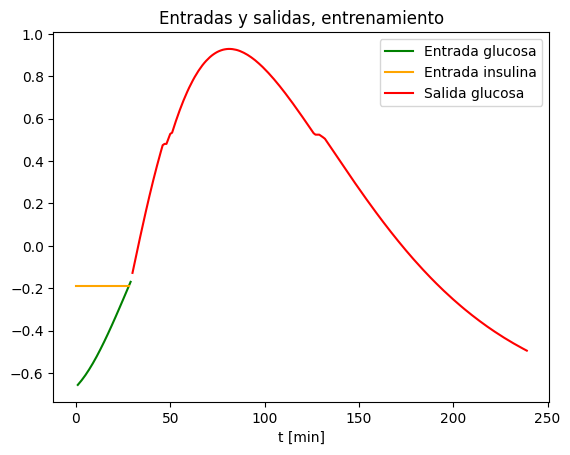

In [100]:
print('Grafica de los datos del dataset')
#plt.plot(data.index, data.iloc[:,2], color='green', label='Glucosa')

Numerocurva = 0

plt.plot(df_X_train_seleccionado.iloc[Numerocurva, 1::2],color='green',label='Entrada glucosa') #Para mostrar solo la glucosa
plt.plot(df_X_train_seleccionado.iloc[Numerocurva, ::2],color='orange',label='Entrada insulina') #Para mostrar solo la glucosa
plt.plot(range(seq_size_input*2, seq_size_output + seq_size_input*2),df_y_train_seleccionado.iloc[Numerocurva,:], color='red',label='Salida glucosa')
plt.title('Entradas y salidas, entrenamiento')
plt.xlabel('t [min]')
#plt.ylabel('Valor de la glucosa')
plt.legend()
#plt.xlim([209, 220])
#plt.ylim([185, 190])
plt.show()
print('')

In [101]:
X_train = df_X_train_seleccionado.values
y_train = df_y_train_seleccionado.values
X_test = df_X_test_seleccionado.values
y_test = df_y_test_seleccionado.values

print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)


(41, 210)
(41, 30)
(17, 210)
(17, 30)


In [102]:
print(len(X_test))

17


In [103]:
X_train = np.reshape(X_train, (len(X_train), seq_size_input, 2))

X_test = np.reshape(X_test, (len(X_test), seq_size_input, 2))
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(41, 210)
(41, 15, 2)
(17, 210)
(17, 15, 2)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60)                15120     
                                                                 
 dense_8 (Dense)             (None, 210)               12810     
                                                                 
Total params: 27,930
Trainable params: 27,930
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 1.8322 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 1.83229, saving model to modelo-1.h5
1/1 [==============================] - 2s 2s/step - loss: 1.8322 - accuracy: 0.0000e+00 - val_loss: 1.8323 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 1.7464 - accuracy: 0.0000e+00
Epoch 2: val_loss improved from 1.832

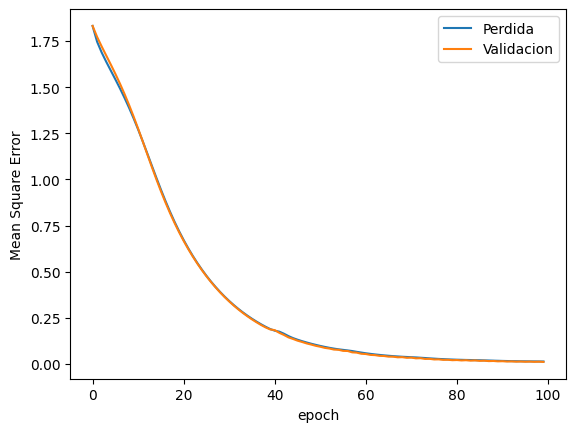

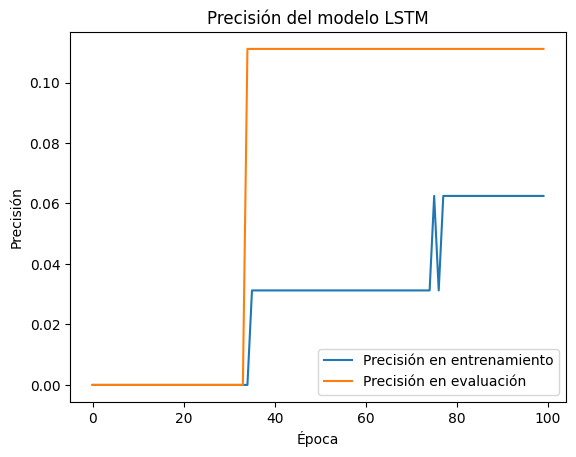

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 60)                15120     
                                                                 
 dense_9 (Dense)             (None, 210)               12810     
                                                                 
Total params: 27,930
Trainable params: 27,930
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1/2 [==============>...............] - ETA: 1s - loss: 1.8959 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 1.38791, saving model to modelo-2.h5
2/2 [==============================] - 2s 394ms/step - loss: 1.9690 - accuracy: 0.0000e+00 - val_loss: 1.3879 - val_accuracy: 0.0000e+00
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 1.8581 - accuracy: 0.0000e+00
Epoch 2: val_loss improved from 1.

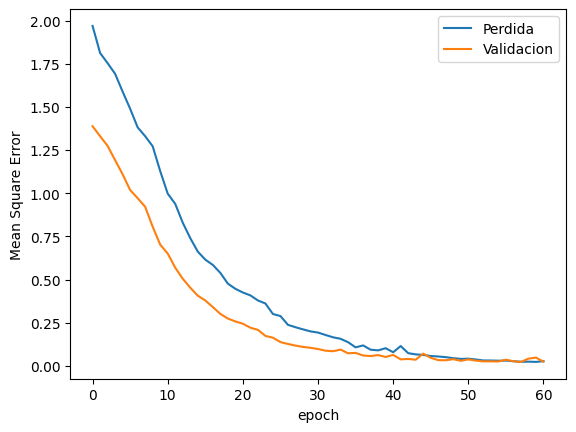

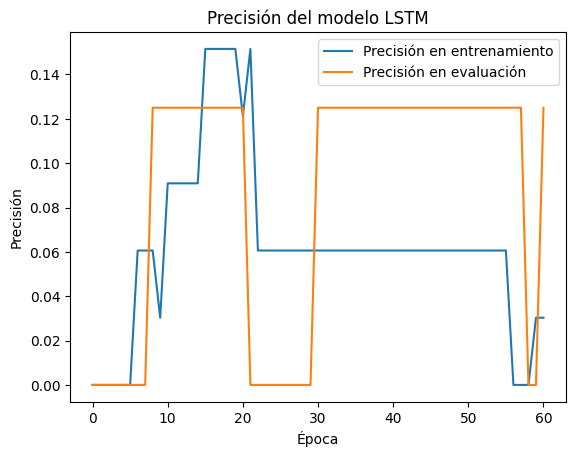

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60)                15120     
                                                                 
 dense_10 (Dense)            (None, 210)               12810     
                                                                 
Total params: 27,930
Trainable params: 27,930
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1/2 [==============>...............] - ETA: 1s - loss: 1.9526 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 1.66612, saving model to modelo-3.h5
2/2 [==============================] - 2s 410ms/step - loss: 1.9175 - accuracy: 0.0000e+00 - val_loss: 1.6661 - val_accuracy: 0.0000e+00
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 1.7047 - accuracy: 0.0000e+00
Epoch 2: val_loss improved from 1

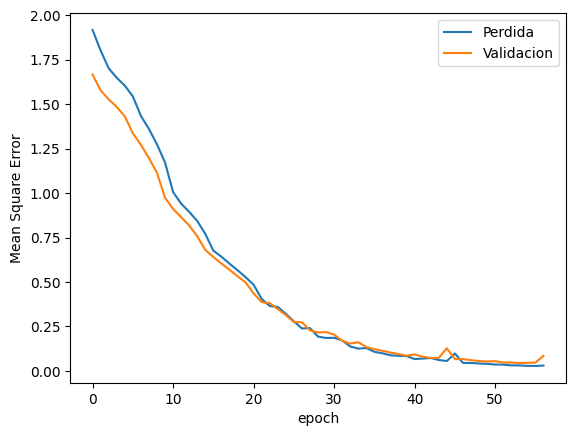

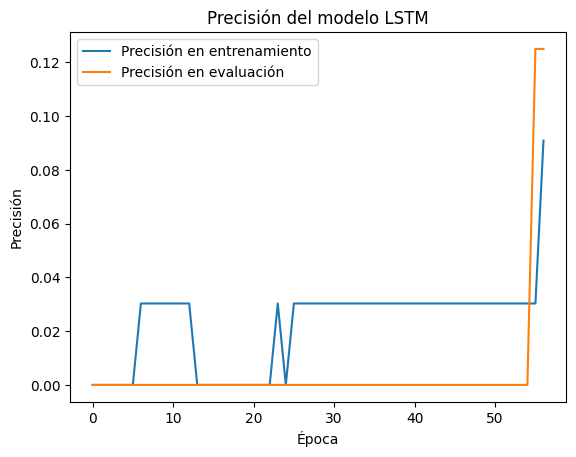

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 60)                15120     
                                                                 
 dense_11 (Dense)            (None, 210)               12810     
                                                                 
Total params: 27,930
Trainable params: 27,930
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1/2 [==============>...............] - ETA: 1s - loss: 1.7934 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 1.71939, saving model to modelo-4.h5
2/2 [==============================] - 2s 390ms/step - loss: 1.8237 - accuracy: 0.0000e+00 - val_loss: 1.7194 - val_accuracy: 0.0000e+00
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 1.5852 - accuracy: 0.0000e+00
Epoch 2: val_loss improved from 1

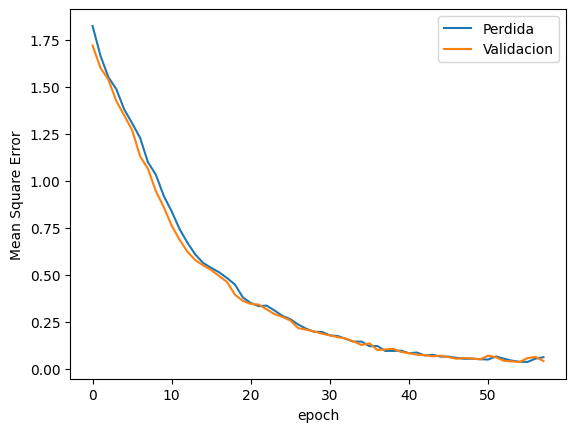

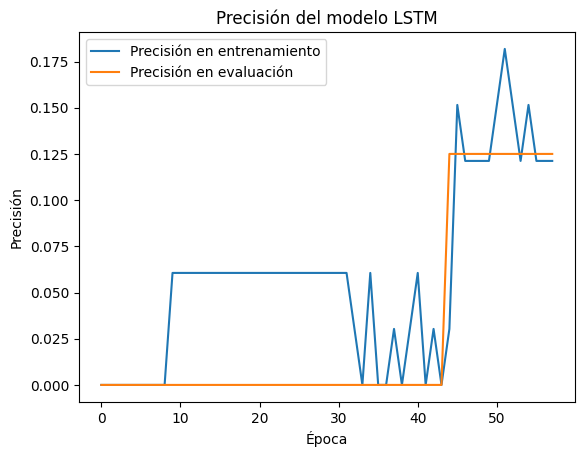

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 60)                15120     
                                                                 
 dense_12 (Dense)            (None, 210)               12810     
                                                                 
Total params: 27,930
Trainable params: 27,930
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1/2 [==============>...............] - ETA: 1s - loss: 1.6921 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 2.07274, saving model to modelo-5.h5
2/2 [==============================] - 2s 382ms/step - loss: 1.8082 - accuracy: 0.0000e+00 - val_loss: 2.0727 - val_accuracy: 0.0000e+00
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 1.6154 - accuracy: 0.0000e+00
Epoch 2: val_loss improved from 2

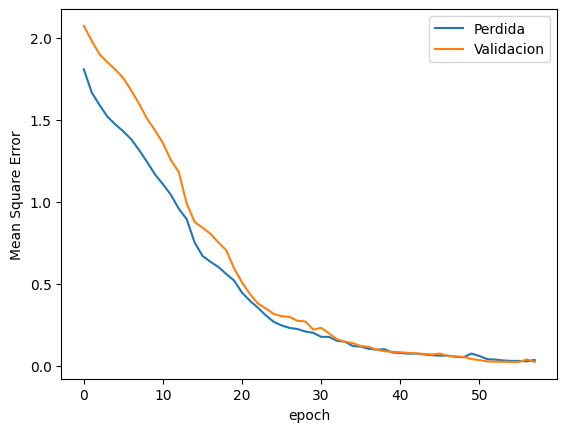

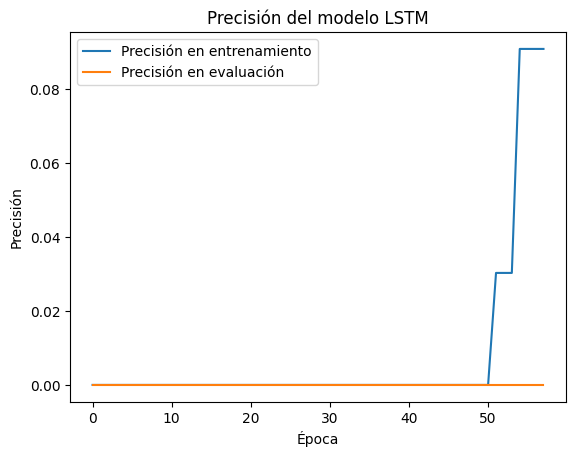

In [104]:
kf = KFold(n_splits=5)
kf.get_n_splits(X_train)
KFold(n_splits=5, random_state=None, shuffle=False)


# Crear listas para almacenar los valores del "average loss" de entrenamiento y validación en cada pliegue
train_losses = []
val_losses = []

#Para guardar el mejor modelo
best_loss = float('inf')
best_model_path = ""

for i, (train_index, test_index) in enumerate(kf.split(X_train,y_train)):
  model = Sequential()
  model.add(LSTM(60, activation='tanh', input_shape=(seq_size_input, 2), kernel_initializer=he_uniform()))
  model.add(Dense(seq_size_output, activation='linear', kernel_initializer=he_uniform()))


  model.compile(optimizer=RMSprop(), loss='mse', metrics=['accuracy'])
  print(model.summary())

  filepath = f"modelo-{i+1}.h5"
  early_stop = EarlyStopping(monitor='val_loss', patience=3)
  checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

  X, y =  X_train[train_index], y_train[train_index]
  X_val, y_val = X_train[test_index], y_train[test_index]


  history = model.fit(X, y, epochs=100, batch_size=32,validation_data=(X_val, y_val),callbacks=[checkpoint, early_stop])

  mediamse = np.mean( history.history['loss'] )
  stdmse = np.std(  history.history['loss'])
  print('')
  print(f" La media del mse, {i}-fold es : {mediamse}")
  print('')
  print(f" La desviacion estandar del mse, {i}-fold es : {stdmse}")

  # Obtener los valores de "average loss" para el pliegue actual
  fold_train_losses = model.history.history['loss']
  fold_val_losses = model.history.history['val_loss']

  # Almacenar los valores de "average loss" para el pliegue actual
  train_losses.append(fold_train_losses)
  val_losses.append(fold_val_losses)

  if min(fold_val_losses) < best_loss:
        best_loss = min(fold_val_losses)
        best_model_path = filepath

  history.history.keys() # aqui me muestra que esta guardando, con history me guarda todos los valores que calcula durante el proceso de entrenamiento

  # vamos a graficar
  plt.plot(history.history['loss'], label='Perdida') # Grafico esta para ver si estoy sobre entrenando
  plt.plot(history.history['val_loss'], label='Validacion') # Grafico esta para ver si estoy sobre entrenando
  plt.xlabel('epoch')
  plt.ylabel('Mean Square Error')
  plt.legend()
  plt.show()

  print(' ')
  # Historial de precisión durante el entrenamiento y la evaluación
  accuracy_train = history.history['accuracy']  # Lista con la precisión durante el entrenamiento
  accuracy_test = history.history['val_accuracy']  # Lista con la precisión durante la evaluación

  # Crear gráfico de precisión
  plt.plot(accuracy_train, label='Precisión en entrenamiento')
  plt.plot(accuracy_test, label='Precisión en evaluación')
  plt.title('Precisión del modelo LSTM')
  plt.xlabel('Época')
  plt.ylabel('Precisión')
  plt.legend()
  plt.show()



In [105]:
# rellenar de ceros los espacios vacios de la lista con loss y validation

df_train_losses = pd.DataFrame(train_losses)

df_filled_train_losses = df_train_losses.fillna(0)

train_losses_completa = df_filled_train_losses.values.tolist()

df_val_losses = pd.DataFrame(val_losses)

df_filled_val_losses = df_val_losses.fillna(0)

val_losses_completa = df_filled_val_losses.values.tolist()


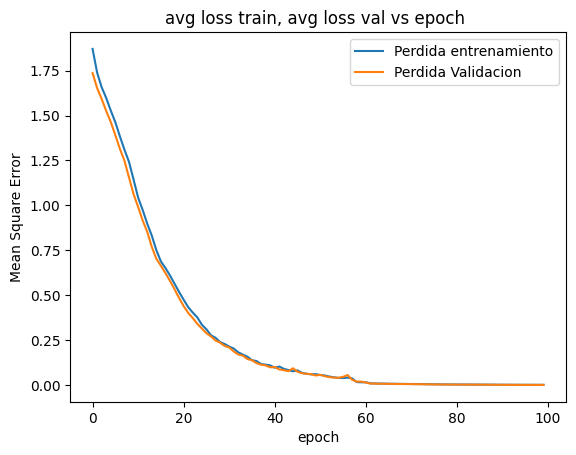

In [106]:

# Calcular el promedio de "average loss" para todos los pliegues y épocas
avg_train_losses = np.mean(train_losses_completa, axis=0)
avg_val_losses = np.mean(val_losses_completa, axis=0)

# vamos a graficar
plt.plot(avg_train_losses, label='Perdida entrenamiento') # Grafico esta para ver si estoy sobre entrenando
plt.plot(avg_val_losses, label='Perdida Validacion') # Grafico esta para ver si estoy sobre entrenando
plt.title('avg loss train, avg loss val vs epoch ')
plt.xlabel('epoch')
plt.ylabel('Mean Square Error')
plt.legend()
plt.show()

In [107]:
# Cargar el mejor modelo
best_model = load_model(best_model_path)

In [108]:
# Seleccionar una secuencia específica
index = 0
input_sequence = X_test[index]

# Hacer la predicción
y_pred = best_model.predict(np.expand_dims(input_sequence, axis=0))
# usamos el np.expand_dims() para agregar una dimensión adicional al inicio de input_sequence
print(y_pred.shape)


1/1 [==============================] - 0s 330ms/step
(1, 210)


In [109]:
# Desenrollar X_test para convertirlo en un array bidimensional
X_test_flattened = X_test.reshape(-1, X_test.shape[-1])

# Aplicar la transformación inversa utilizando el objeto StandardScaler
X_test_desnormalizado = sc.inverse_transform(X_test_flattened)

# Volver a darle forma a X_test_desnormalizado a su forma original
X_test = X_test_desnormalizado.reshape(X_test.shape)

# Desnormalizar los datos
y_pred = sc_y.inverse_transform(y_pred)

y_test = sc_y.inverse_transform(y_test)

print(y_pred.shape)
print(y_test.shape)
print(X_test.shape)

(1, 210)
(17, 210)
(17, 15, 2)


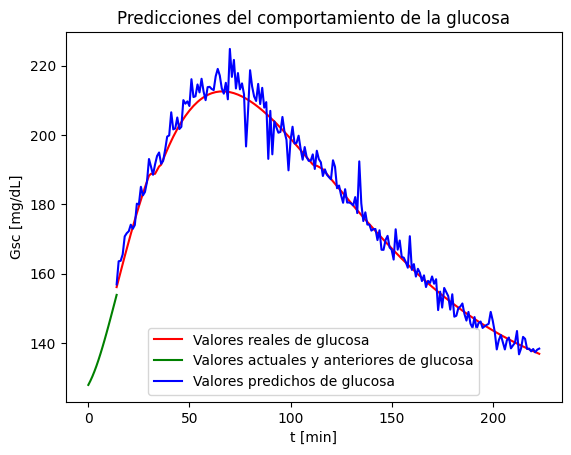

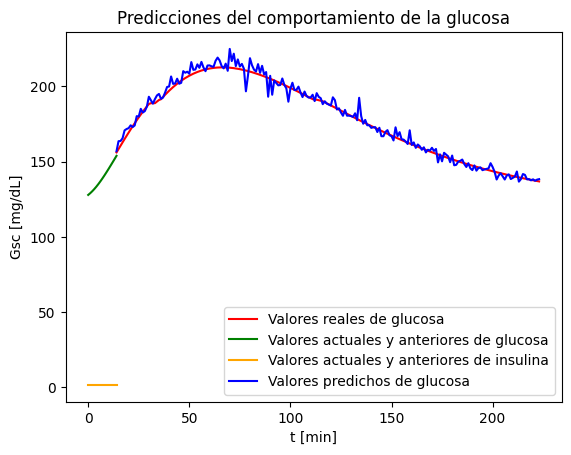

In [110]:
# Grafica del comportamiento de la glucosa en el desayuno del dia 15
Curva=0

plt.plot(range(seq_size_input-1, seq_size_input-1+seq_size_output),y_test[Curva,:],color='red', label='Valores reales de glucosa')
plt.plot(X_test[Curva,:,1],color='green', label='Valores actuales y anteriores de glucosa')
plt.plot(range(seq_size_input-1, seq_size_input-1+seq_size_output),y_pred[0,:],color='blue', label='Valores predichos de glucosa')
plt.title('Predicciones del comportamiento de la glucosa')
plt.xlabel('t [min]')
plt.ylabel('Gsc [mg/dL]')
plt.legend()
plt.show()

print('')
# Grafica del comportamiento de la glucosa en el desayuno del dia 15
plt.plot(range(seq_size_input-1, seq_size_input-1+seq_size_output),y_test[Curva,:],color='red', label='Valores reales de glucosa')
plt.plot(X_test[Curva,:,1],color='green', label='Valores actuales y anteriores de glucosa')
plt.plot(X_test[Curva,:,0],color='orange', label='Valores actuales y anteriores de insulina')
plt.plot(range(seq_size_input-1, seq_size_input-1+seq_size_output),y_pred[0,:],color='blue', label='Valores predichos de glucosa')
plt.title('Predicciones del comportamiento de la glucosa')
plt.xlabel('t [min]')
plt.ylabel('Gsc [mg/dL]')
plt.legend()
plt.show()

In [111]:
# Definir la matriz que contiene la curva
#fila_curva =  X_train[0,:,1] # Ejemplo de matriz con 3 filas

fila_curva =  y_test[0,:] # Ejemplo de matriz con 3 filas

# Restarle la glucosa basal a cada elemento del array
for i in range(len(fila_curva)):
    fila_curva[i] -= 105

# Calcular el área bajo la curva usando la regla del trapecio
xx = np.arange(len(fila_curva))  # Valores x
yy = fila_curva  # Valores y
area = np.trapz(yy, xx)

arear = (area*15)/1000

print("El área bajo la curva es:", arear)

El área bajo la curva es: 229.472625


In [112]:
# Definir la matriz que contiene la curva
#fila_curva =  X_train[0,:,1] # Ejemplo de matriz con 3 filas

fila_curva =  y_pred[0,:] # Ejemplo de matriz con 3 filas

# Restarle la glucosa basal a cada elemento del array
for i in range(len(fila_curva)):
    fila_curva[i] -= 105

# Calcular el área bajo la curva usando la regla del trapecio
xx = np.arange(len(fila_curva))  # Valores x
yy = fila_curva  # Valores y
area = np.trapz(yy, xx)

arear = (area*15)/1000

print("El área bajo la curva es:", arear)

El área bajo la curva es: 232.666083984375


In [113]:
# Media MSE y desviacion estandar MSE de las prediciones con la escala normal
mse = mean_squared_error(y_test[0,:].flatten(), y_pred.flatten())
std = np.sqrt(mse)
mediamse = np.mean(mse)

print('La media MSE:',mediamse)
print('La desviacion standar MSE', std)

# calcular la MAE
mae = mean_absolute_error(y_test[0,:], y_pred[0,:])
print('MAE:', mae)

# calcular la RMSE
rmse = np.sqrt(mean_squared_error(y_test[0,:], y_pred[0,:]))
print('RMSE:', rmse)

La media MSE: 12.461004765110069
La desviacion standar MSE 3.5300148392195276
MAE: 2.4448387887137284
RMSE: 3.5300148392195276
